In [1]:
import torch
import numpy as np

In [2]:
import torchvision

In [3]:
cinic_dat = np.load("../data/cifar10_neg/CIFAR10_neg.npz")

In [46]:
cifar10_dat = torchvision.datasets.CIFAR10('../data', train=True, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data


In [3]:
xdat = cinic_dat['data']
ydat = cinic_dat['labels']

In [17]:
cls_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
import matplotlib.pyplot as plt

In [109]:
def plot_class(cls):
    print(cls_names[cls])
    plt.figure(figsize=(10, 10))
    idx = np.where(np.array(cifar10_dat.targets) == cls)[0]
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        if i < 8:
            plt.imshow(cifar10_dat.data[idx[i]])
        else:
            plt.imshow(xdat[100 * cls + i - 8])
        plt.grid(False)
        plt.axis('off')

    plt.savefig('../plots/notebook/01_cls_' + cls_names[cls] + '.png',
                bbox_inches='tight')
    plt.show()

airplane


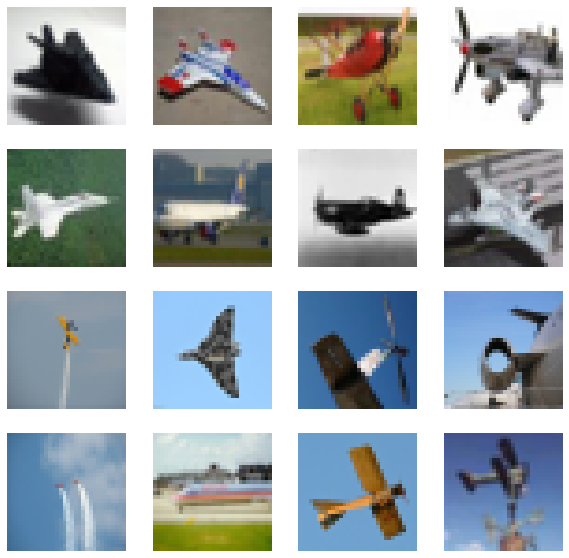

In [110]:
plot_class(0)

automobile


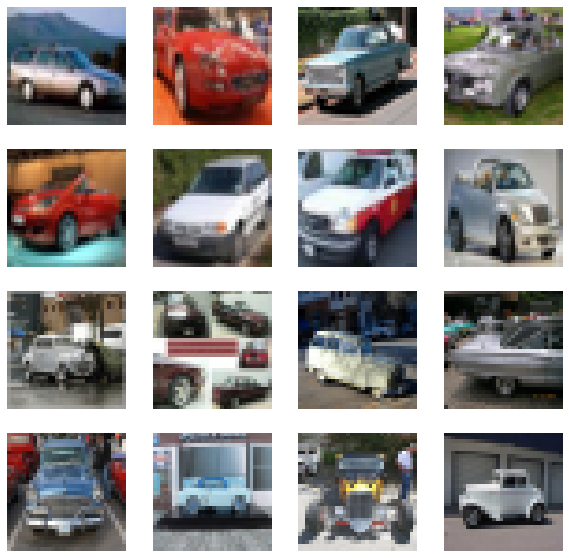

In [111]:
plot_class(1)

bird


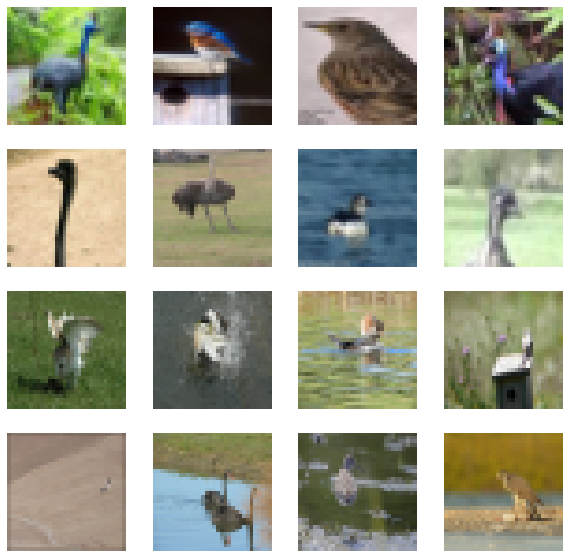

In [112]:
plot_class(2)

cat


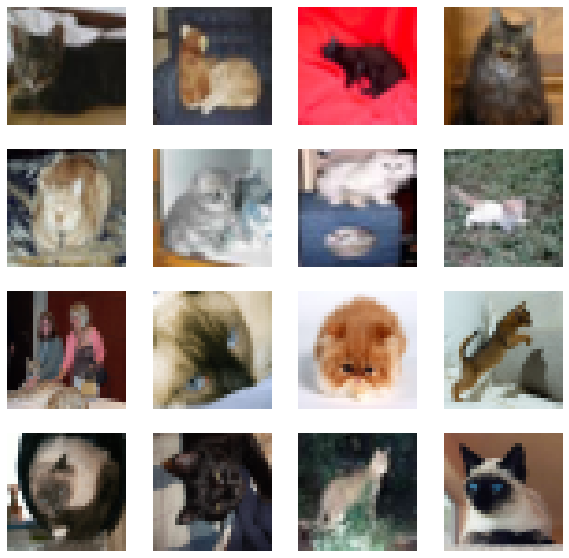

In [113]:
plot_class(3)

deer


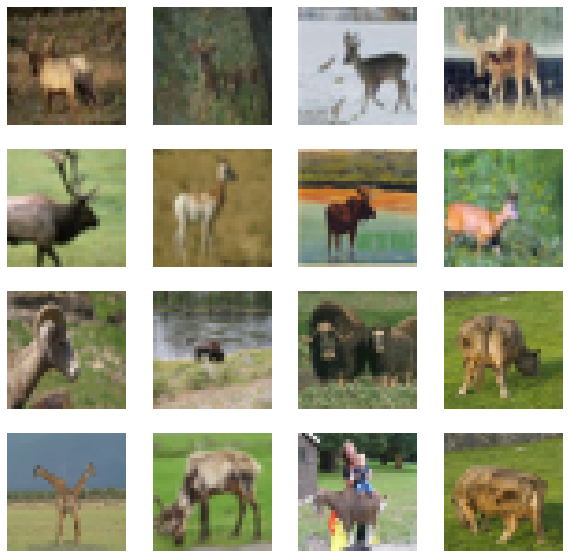

In [114]:
plot_class(4)

dog


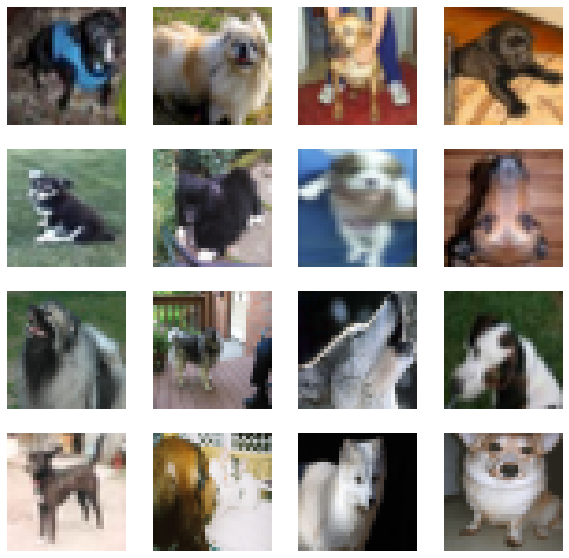

In [115]:
plot_class(5)

frog


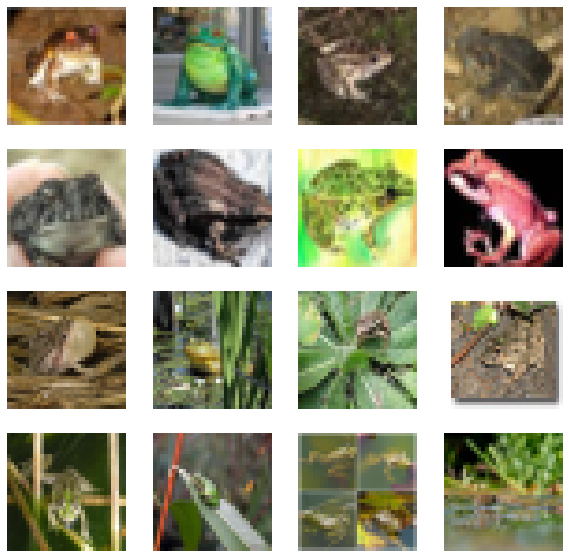

In [116]:
plot_class(6)

horse


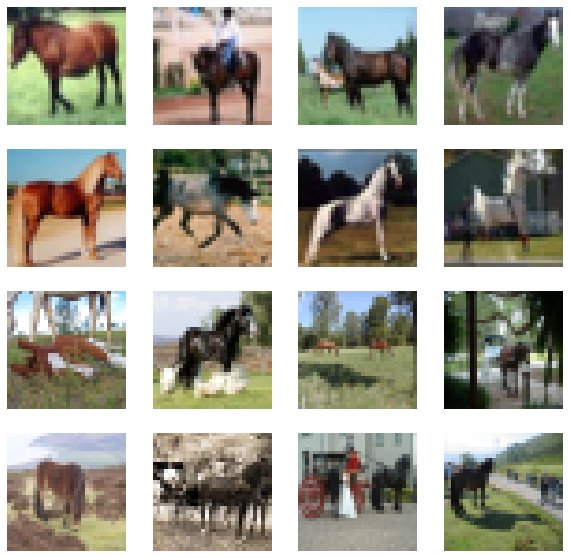

In [117]:
plot_class(7)

ship


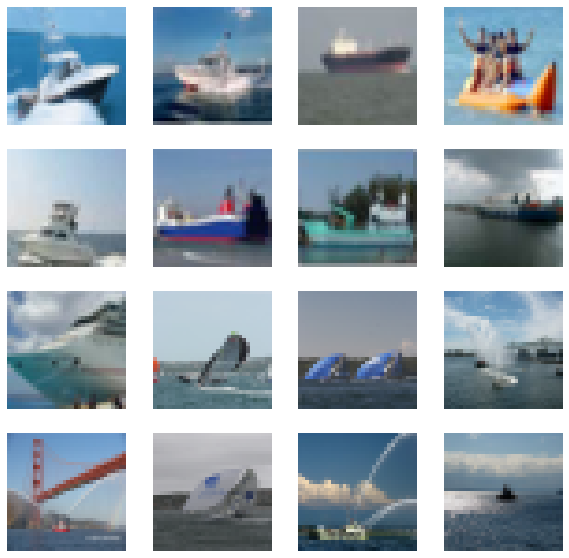

In [118]:
plot_class(8)

truck


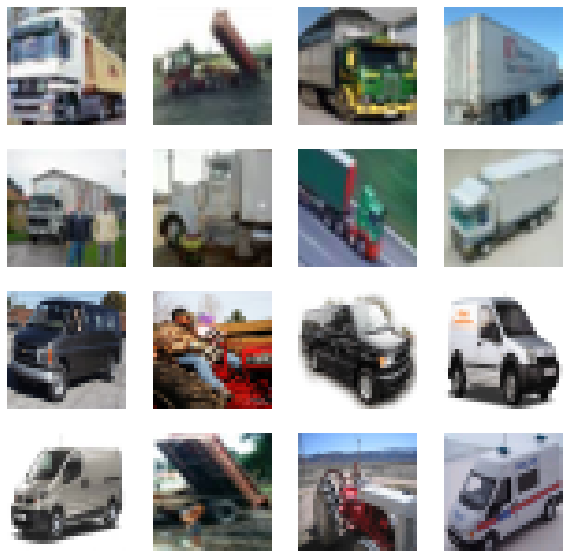

In [119]:
plot_class(9)

## CINIC vs CIFAR10-negative

In [37]:
import torch
import numpy as np
import matplotlib.image as mpimg
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
cifar10_neg = np.load("../data/cifar10_neg/CIFAR10_neg.npz")
cifar10_neg_ind = np.load("../data/cifar10_neg/CIFAR10_neg_idx.npz")['idx']

xcifar10_neg = cifar10_neg['data']
ycifar10_neg = cifar10_neg['labels']

In [12]:
cinic_mean = [0.50, 0.50, 0.50]
cinic_std = [0.25, 0.25, 0.25]


cinic_train = torchvision.datasets.ImageFolder(
        '../data/cinic-10/train',
        transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=cinic_mean,std=cinic_std)]))


In [88]:
def get_ind(x):
    x = x.split("_")[-1]
    x = x.split(".")[0]
    return int(x)

In [89]:
pure_cinic = []

for img in cinic_train.imgs:
    if "cifar10-train" in img[0]:
        continue
    pure_cinic.append(img)

In [91]:
cinic_inds = [get_ind(x[0]) for x in pure_cinic]

In [92]:
cinic_inds = np.array(cinic_inds)
# cinic_inds = cinic_inds[cinic_inds < 0.0]

In [98]:
for idx, ind in enumerate(cinic_inds):
    if ind == cifar10_neg_ind[0]:
        print(idx)
        break

13830


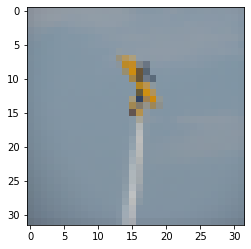

In [56]:
plt.imshow(xcifar10_neg[0])

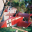

In [57]:
Image.open(cinic_train.imgs[cifar10_neg_ind[0]][0])

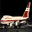

In [97]:
Image.open(pure_cinic[cifar10_neg_ind[0]][0])

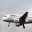

In [106]:
np.array(Image.open(pure_cinic[5][0]))